# Preparación/Organización de Datasets | Proyecto Final | Minería de Datos | Maestría en Ciencia de Datos | UPB

Realizado por: Thomas Camilo Vanegas Acevedo - https://www.linkedin.com/in/thomasvanegasdev/ - https://github.com/thomasvanegas

En presente notebook se realiza un procesamiento de dos tablas de Excel (atributos_skus_2025.xlsx y ventas_x_sku_2025.xlsx), asociadas a una empresa textil, con el objetivo de integrar datos para la construcción de algortimos de Machine Learning.

**Estructura Tabla N°1 =>** SKU, ene25, feb25, mar25, ..., ago25 => Representa un histórico de ventas de SKU en cada mes.

**Estructura Tabla N°2 =>** Referencia, Color, Talla, SKU, Canal_Venta => Representa información transaccional y posee los atributos de cada SKU.


In [ ]:
# Importacion de bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Seleccionar los dos archivos de excel y creacion de DataFrames de Pandas.
ventas_sku_2025 = pd.read_excel('./ventas_x_sku_2025.xlsx') #Tabla1
atributos_sku = pd.read_excel('./atributos_skus_2025.xlsx') #Tabla2

In [ ]:
ventas_sku_2025.head()

,sku,enero_2025,febrero_2025,marzo_2025,abril_2025,mayo_2025,junio_2025,julio_2025,agosto_2025
0,SXA-00728BEIGEXL,4,5,1,0,8,7,42,15
1,SXA-00728BEIGEL,12,36,7,7,26,41,10,64
2,SXA-00728BEIGE2XL,4,1,0,0,8,3,11,6
3,SXA-00728NEGROXL,8,15,0,1,3,0,0,3
4,SXA-00728NEGROL,18,23,6,1,16,10,14,49


In [ ]:
ventas_sku_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sku           1248 non-null   object
 1   enero_2025    1248 non-null   int64 
 2   febrero_2025  1248 non-null   int64 
 3   marzo_2025    1248 non-null   int64 
 4   abril_2025    1248 non-null   int64 
 5   mayo_2025     1248 non-null   int64 
 6   junio_2025    1248 non-null   int64 
 7   julio_2025    1248 non-null   int64 
 8   agosto_2025   1248 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 87.9+ KB


In [ ]:
ventas_sku_2025['sku'] = ventas_sku_2025['sku'].astype('category')

In [ ]:
ventas_sku_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sku           1248 non-null   category
 1   enero_2025    1248 non-null   int64   
 2   febrero_2025  1248 non-null   int64   
 3   marzo_2025    1248 non-null   int64   
 4   abril_2025    1248 non-null   int64   
 5   mayo_2025     1248 non-null   int64   
 6   junio_2025    1248 non-null   int64   
 7   julio_2025    1248 non-null   int64   
 8   agosto_2025   1248 non-null   int64   
dtypes: category(1), int64(8)
memory usage: 122.6 KB


In [ ]:
ventas_sku_2025.head()

,sku,enero_2025,febrero_2025,marzo_2025,abril_2025,mayo_2025,junio_2025,julio_2025,agosto_2025
0,SXA-00728BEIGEXL,4,5,1,0,8,7,42,15
1,SXA-00728BEIGEL,12,36,7,7,26,41,10,64
2,SXA-00728BEIGE2XL,4,1,0,0,8,3,11,6
3,SXA-00728NEGROXL,8,15,0,1,3,0,0,3
4,SXA-00728NEGROL,18,23,6,1,16,10,14,49


Con el dataset "ventas_sku_2025" se calcula el promedio de ventas durante los 8 meses, para obtener una columna nueva, denominada promedio de ventas.

In [ ]:
meses = ["enero_2025", "febrero_2025", "marzo_2025", "abril_2025", "mayo_2025", "junio_2025", "julio_2025", "agosto_2025"]
ventas_sku_2025['promedio_ventas_2025'] = ventas_sku_2025[meses].mean(axis=1)

In [ ]:
ventas_sku_2025.head()

,sku,enero_2025,febrero_2025,marzo_2025,abril_2025,mayo_2025,junio_2025,julio_2025,agosto_2025,promedio_ventas_2025
0,SXA-00728BEIGEXL,4,5,1,0,8,7,42,15,10.250
1,SXA-00728BEIGEL,12,36,7,7,26,41,10,64,25.375
2,SXA-00728BEIGE2XL,4,1,0,0,8,3,11,6,4.125
3,SXA-00728NEGROXL,8,15,0,1,3,0,0,3,3.750
4,SXA-00728NEGROL,18,23,6,1,16,10,14,49,17.125


In [ ]:
ventas_sku_2025['total_ventas_2025'] = ventas_sku_2025[meses].sum(axis=1)

In [ ]:
ventas_sku_2025.head()

,sku,enero_2025,febrero_2025,marzo_2025,abril_2025,mayo_2025,junio_2025,julio_2025,agosto_2025,promedio_ventas_2025,total_ventas_2025
0,SXA-00728BEIGEXL,4,5,1,0,8,7,42,15,10.250,82
1,SXA-00728BEIGEL,12,36,7,7,26,41,10,64,25.375,203
2,SXA-00728BEIGE2XL,4,1,0,0,8,3,11,6,4.125,33
3,SXA-00728NEGROXL,8,15,0,1,3,0,0,3,3.750,30
4,SXA-00728NEGROL,18,23,6,1,16,10,14,49,17.125,137


In [ ]:
ventas_sku_2025 = ventas_sku_2025.drop(meses, axis=1)

In [ ]:
ventas_sku_2025.head()

,sku,promedio_ventas_2025,total_ventas_2025
0,SXA-00728BEIGEXL,10.250,82
1,SXA-00728BEIGEL,25.375,203
2,SXA-00728BEIGE2XL,4.125,33
3,SXA-00728NEGROXL,3.750,30
4,SXA-00728NEGROL,17.125,137


In [ ]:
ventas_sku_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   sku                   1248 non-null   category
 1   promedio_ventas_2025  1248 non-null   float64 
 2   total_ventas_2025     1248 non-null   int64   
dtypes: category(1), float64(1), int64(1)
memory usage: 64.1 KB


In [ ]:
ventas_sku_2025.to_csv('ventas_sku_2025.csv', index=False)

In [ ]:
atributos_sku.head()

,referencia,color,talla,sku,canal_venta
0,F-0029-N,NEGRO,S,F-0029-NNEGROS,TIENDAS
1,F-0120-N,NEGRO,M,F-0120-NNEGROM,TIENDAS
2,MLE-UNI,GRIS/NEGR,UNI,MLE-UNIGRIS/NEGRUNI,TIENDAS
3,EX-003,NEGRO,UNI,EX-003NEGROUNI,TIENDAS
4,F-0029-N,BEIGE,S,F-0029-NBEIGES,TIENDAS


In [ ]:
atributos_sku = atributos_sku.drop('canal_venta', axis=1)

In [ ]:
atributos_sku.head()

,referencia,color,talla,sku
0,F-0029-N,NEGRO,S,F-0029-NNEGROS
1,F-0120-N,NEGRO,M,F-0120-NNEGROM
2,MLE-UNI,GRIS/NEGR,UNI,MLE-UNIGRIS/NEGRUNI
3,EX-003,NEGRO,UNI,EX-003NEGROUNI
4,F-0029-N,BEIGE,S,F-0029-NBEIGES


In [ ]:
atributos_sku_sd = atributos_sku.copy()

In [ ]:
atributos_sku_sd = atributos_sku_sd.drop_duplicates(subset=['sku'], keep='first')

In [ ]:
atributos_sku_sd.head()

,referencia,color,talla,sku
0,F-0029-N,NEGRO,S,F-0029-NNEGROS
1,F-0120-N,NEGRO,M,F-0120-NNEGROM
2,MLE-UNI,GRIS/NEGR,UNI,MLE-UNIGRIS/NEGRUNI
3,EX-003,NEGRO,UNI,EX-003NEGROUNI
4,F-0029-N,BEIGE,S,F-0029-NBEIGES


In [ ]:
atributos_sku_sd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2424 entries, 0 to 278655
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   referencia  2424 non-null   object
 1   color       2424 non-null   object
 2   talla       2424 non-null   object
 3   sku         2424 non-null   object
dtypes: object(4)
memory usage: 94.7+ KB


In [ ]:
atributos_sku_sd = atributos_sku_sd.astype({
    'sku': 'category',
    'referencia': 'category',
    'color': 'category',
    'talla': 'category',
})

In [ ]:
atributos_sku.info()
ventas_sku_2025.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2424 entries, 0 to 278655
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   referencia  2424 non-null   category
 1   color       2424 non-null   category
 2   talla       2424 non-null   category
 3   sku         2424 non-null   category
dtypes: category(4)
memory usage: 128.7 KB


In [ ]:
# Union de ambos dataframes usando 'sku' como clave (INNER JOIN DE SQL)
df = pd.merge(
    atributos_sku_sd,       # Contiene referencia, color, talla, sku
    ventas_sku_2025,        # Contiene sku, promedio y total
    on="sku",               # Clave de unión
    how="inner"             # Solo conserva los sku presentes en ventas_sku_2025
)

In [ ]:
df.head()

,referencia,color,talla,sku,promedio_ventas_2025,total_ventas_2025
0,F-0029-N,NEGRO,S,F-0029-NNEGROS,77.750,622
1,F-0120-N,NEGRO,M,F-0120-NNEGROM,55.250,442
2,EX-003,NEGRO,UNI,EX-003NEGROUNI,59.750,478
3,F-0029-N,BEIGE,S,F-0029-NBEIGES,114.375,915
4,C-4053-N,BEIGE,2XS,C-4053-NBEIGE2XS,14.875,119


In [ ]:
df.shape

(1234, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   referencia            1234 non-null   category
 1   color                 1234 non-null   category
 2   talla                 1234 non-null   category
 3   sku                   1234 non-null   object  
 4   promedio_ventas_2025  1234 non-null   float64 
 5   total_ventas_2025     1234 non-null   int64   
dtypes: category(3), float64(1), int64(1), object(1)
memory usage: 45.9+ KB


In [ ]:
df = df.drop('sku', axis=1)

In [ ]:
df.head()

,referencia,color,talla,promedio_ventas_2025,total_ventas_2025
0,F-0029-N,NEGRO,S,77.750,622
1,F-0120-N,NEGRO,M,55.250,442
2,EX-003,NEGRO,UNI,59.750,478
3,F-0029-N,BEIGE,S,114.375,915
4,C-4053-N,BEIGE,2XS,14.875,119


In [ ]:
# Se crea una nueva columna denominada "tipo_prenda"
# CREACION DE NUEVAS VARIABLES
df['tipo_prenda'] = df['referencia'].str.split('-').str[0]
df.head()

,referencia,color,talla,promedio_ventas_2025,total_ventas_2025,tipo_prenda
0,F-0029-N,NEGRO,S,77.750,622,F
1,F-0120-N,NEGRO,M,55.250,442,F
2,EX-003,NEGRO,UNI,59.750,478,EX
3,F-0029-N,BEIGE,S,114.375,915,F
4,C-4053-N,BEIGE,2XS,14.875,119,C


In [ ]:
# Obtener la cantidad de tipos de prendas
# NO TRABAJAR: TODO LO QUE TERMINE EN TB;
tipos_prendas_unicos = df['tipo_prenda'].unique()

print(f'Los tipos de prendas que existen son: {tipos_prendas_unicos}')
# Se trabaran con 22 tipos de prendas

Los tipos de prendas que existen son: ['F' 'EX' 'C' 'SXA' 'CH' 'STA' 'B' 'CA' 'STB' 'MD' 'MA' 'T' 'E' 'M' 'TA'
 'CN' 'S' 'G' 'BE' 'PL' 'H' 'FL']


In [ ]:
df.describe()

,promedio_ventas_2025,total_ventas_2025
count,1234.000000,1234.000000
mean,42.981159,343.849271
std,73.873087,590.984698
min,0.125000,1.000000
25%,9.875000,79.000000
50%,22.062500,176.500000
75%,51.937500,415.500000
max,1533.875000,12271.000000


array([[<Axes: title={'center': 'promedio_ventas_2025'}>,
        <Axes: title={'center': 'total_ventas_2025'}>]], dtype=object)

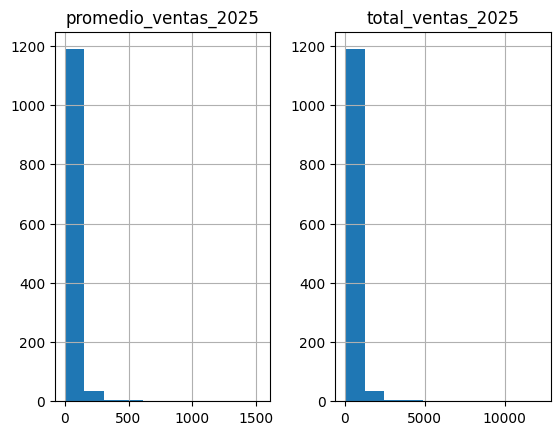

In [ ]:
df.hist()

In [ ]:
df.head()

,referencia,color,talla,promedio_ventas_2025,total_ventas_2025,tipo_prenda
0,F-0029-N,NEGRO,S,77.750,622,F
1,F-0120-N,NEGRO,M,55.250,442,F
2,EX-003,NEGRO,UNI,59.750,478,EX
3,F-0029-N,BEIGE,S,114.375,915,F
4,C-4053-N,BEIGE,2XS,14.875,119,C


Se elimina referencia debido a que es un ID, es decir, no aporta información a los algoritmos descriptivos o predictivos.

In [ ]:
df = df.drop('referencia', axis=1)

In [ ]:
df.head()

,color,talla,promedio_ventas_2025,total_ventas_2025,tipo_prenda
0,NEGRO,S,77.750,622,F
1,NEGRO,M,55.250,442,F
2,NEGRO,UNI,59.750,478,EX
3,BEIGE,S,114.375,915,F
4,BEIGE,2XS,14.875,119,C


In [ ]:
df.to_csv('dataset_pf_mineria_datos.csv', index=False)